This is still just python code, but like an Rmd notebook, you can mix code with Markdown and output

In [1]:
import pandas as pd
import numpy as np

Let's import some data and display it

In [2]:
police_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/police-locals/police-locals.csv', sep=',')
police_df.head()

,city,police_force_size,all,white,non-white,black,hispanic,asian
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158
3,Washington,9340,0.115632,0.056774,0.157365,0.170189099,0.08988764,0.230769231
4,Houston,7700,0.292208,0.173735,0.399258,0.36637931,0.457142857,0.408163265


You can run cells using the "play button" at the top, the "kernel" menu, or "Shift+Enter".

In [3]:
city_df = pd.read_csv('https://gist.githubusercontent.com/Miserlou/11500b2345d3fe850c92/raw/e36859a9eef58c231865429ade1c142a2b75f16e/gistfile1.txt', sep=',', skiprows=3)
city_df.head()

,rank,city,state,population,2000-2013 growth
0,1,New York,New York,8405837,4.8%
1,2,Los Angeles,California,3884307,4.8%
2,3,Chicago,Illinois,2718782,-6.1%
3,4,Houston,Texas,2195914,11.0%
4,5,Philadelphia,Pennsylvania,1553165,2.6%


A Pandas "series" is like a list or an array. Rows and columns are Series objects.

In [4]:
police_df['city'].head()

0       New York
1        Chicago
2    Los Angeles
3     Washington
4        Houston
Name: city, dtype: object

"Shape" is a numpy property inherited by Pandas objects.

In [5]:
police_df.shape

(75, 8)

In [6]:
# How many rows in dataframe?
police_df.shape[0]

75

To select specific elements, use the indexing functions

In [7]:
police_df['city'][0]

'New York'

In [8]:
police_df['city'].iloc[0]

'New York'

Dataframes are similar to those in R. They can represent many different types of data, and implement many wrangling operations for you.

In [9]:
# Select a column and then select the first 5 elements
police_df['city'][:5]

0       New York
1        Chicago
2    Los Angeles
3     Washington
4        Houston
Name: city, dtype: object

In [10]:
# Select a column and then select the first 5 elements (but different)
police_df.city[:5]

0       New York
1        Chicago
2    Los Angeles
3     Washington
4        Houston
Name: city, dtype: object

In [11]:
# Select two columns and then select the first 5 elements
police_df[['city', 'all']].head(5)

,city,all
0,New York,0.617957
1,Chicago,0.875000
2,Los Angeles,0.228218
3,Washington,0.115632
4,Houston,0.292208


In [12]:
# Select row
police_df.iloc[10]

city                 San Francisco
police_force_size             3020
all                       0.316225
white                     0.259494
non-white                 0.378472
black                  0.186046512
hispanic               0.253333333
asian                  0.486111111
Name: 10, dtype: object

In [13]:
# Select two rows
police_df.iloc[10:12]

,city,police_force_size,all,white,non-white,black,hispanic,asian
10,San Francisco,3020,0.316225,0.259494,0.378472,0.186046512,0.253333333,0.486111111
11,San Antonio,2955,0.624365,0.443878,0.713924,0.574468085,0.739130435,**


In [14]:
# Sort dataframe
police_df.sort_values(by=['police_force_size']).head()

,city,police_force_size,all,white,non-white,black,hispanic,asian
74,"San Bernardino, Calif.",755,0.271523,0.263158,0.280000,**,0.274509804,**
73,"Corpus Christi, Texas",770,0.857143,0.893333,0.822785,**,0.847222222,**
72,"Madison, Wis.",790,0.278481,0.246479,0.562500,**,**,**
71,"Toledo, Ohio",805,0.565217,0.530769,0.709677,0.75,**,**
69,"Savannah, Ga.",860,0.215116,0.076923,0.299065,0.170731707,0.75,**


In [15]:
# Sort dataframe in reverse
police_df.sort_values(by=['police_force_size'], ascending=False).head()

,city,police_force_size,all,white,non-white,black,hispanic,asian
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158
3,Washington,9340,0.115632,0.056774,0.157365,0.170189099,0.08988764,0.230769231
4,Houston,7700,0.292208,0.173735,0.399258,0.36637931,0.457142857,0.408163265


In [16]:
# Filter dataframe
police_df[police_df.police_force_size < 800]

,city,police_force_size,all,white,non-white,black,hispanic,asian
72,"Madison, Wis.",790,0.278481,0.246479,0.562500,**,**,**
73,"Corpus Christi, Texas",770,0.857143,0.893333,0.822785,**,0.847222222,**
74,"San Bernardino, Calif.",755,0.271523,0.263158,0.280000,**,0.274509804,**


In [17]:
# Filter dataframe using multiple constraints
police_df[(police_df.police_force_size < 800) & (police_df['all'] < 0.5)]

,city,police_force_size,all,white,non-white,black,hispanic,asian
72,"Madison, Wis.",790,0.278481,0.246479,0.5625,**,**,**
74,"San Bernardino, Calif.",755,0.271523,0.263158,0.2800,**,0.274509804,**


In [18]:
# Add a new column
police_df['new_column'] = 5
police_df.head(3)

,city,police_force_size,all,white,non-white,black,hispanic,asian,new_column
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474,5
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667,5
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158,5


In [19]:
# Add a new column based on data from another column (lambda functions are simple, one-line functions)
police_df['big_police_force'] = police_df['police_force_size'].apply(lambda x: x > 1500)
police_df.sort_values(by=['city']).head()

,city,police_force_size,all,white,non-white,black,hispanic,asian,new_column,big_police_force
67,"Albany, N.Y.",890,0.185393,0.160256,0.363636,**,**,**,5,False
46,"Albuquerque, N.M.",1340,0.615672,0.629630,0.601504,**,0.566371681,**,5,False
44,"Arlington, Va.",1360,0.202206,0.222222,0.179688,0.16,**,**,5,False
12,Atlanta,2950,0.137288,0.186275,0.111399,0.101983003,**,**,5,True
22,"Austin, Texas",1985,0.294710,0.194690,0.426901,0.25,0.453846154,**,5,True


In [20]:
# Join two data frames using merge (".join()" is also a function, but I like merge)
police_city_df = police_df.merge(city_df, on='city', how='left')
police_city_df.head()

,city,police_force_size,all,white,non-white,black,hispanic,asian,new_column,big_police_force,rank,state,population,2000-2013 growth
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474,5,True,1,New York,8405837,4.8%
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667,5,True,3,Illinois,2718782,-6.1%
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158,5,True,2,California,3884307,4.8%
3,Washington,9340,0.115632,0.056774,0.157365,0.170189099,0.08988764,0.230769231,5,True,23,District of Columbia,646449,13.0%
4,Houston,7700,0.292208,0.173735,0.399258,0.36637931,0.457142857,0.408163265,5,True,4,Texas,2195914,11.0%


In [21]:
police_city_df['growth'] = police_city_df['2000-2013 growth'].apply(lambda x: float(str(x).rstrip('%')))
police_city_df.head()

,city,police_force_size,all,white,non-white,black,hispanic,asian,new_column,big_police_force,rank,state,population,2000-2013 growth,growth
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474,5,True,1,New York,8405837,4.8%,4.8
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667,5,True,3,Illinois,2718782,-6.1%,-6.1
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158,5,True,2,California,3884307,4.8%,4.8
3,Washington,9340,0.115632,0.056774,0.157365,0.170189099,0.08988764,0.230769231,5,True,23,District of Columbia,646449,13.0%,13.0
4,Houston,7700,0.292208,0.173735,0.399258,0.36637931,0.457142857,0.408163265,5,True,4,Texas,2195914,11.0%,11.0


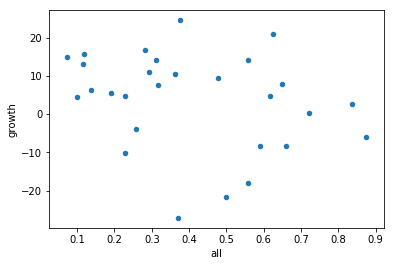

In [26]:
# Plot city growth vs fraction of officers that live in city as a scatter plot
police_city_df.plot.scatter(x='all', y='growth')

In [23]:
# Iterate over sub-data frames, grouped by the "big_police_force" variable
for value, sub_df in police_df.groupby('big_police_force'):
    print(sub_df.head())

                    city  police_force_size       all     white  non-white  \
36  Oklahoma City, Okla.               1500  0.596667  0.547325   0.807018   
37               Seattle               1445  0.117647  0.115578   0.122222   
38      Kansas City, Mo.               1440  0.777778  0.768000   0.842105   
39      Nashville, Tenn.               1440  0.618056  0.437158   0.933333   
40         Laredo, Texas               1435  0.937282  0.962963   0.931330   

          black     hispanic asian  new_column  big_police_force  
36   0.62962963           **    **           5             False  
37       0.1875            0    **           5             False  
38            1           **    **           5             False  
39  0.947368421           **    **           5             False  
40           **  0.931330472    **           5             False  
          city  police_force_size       all     white  non-white        black  \
0     New York              32300  0.617957  0.4

"groupby()" can be used to summarize and count

In [24]:
police_city_df.groupby('state').size().sort_values(ascending=False).head()

state
Texas           3
California      3
Pennsylvania    2
Ohio            2
Wisconsin       1
dtype: int64

In [25]:
# Write dataframe to file
police_city_df.to_csv('police_city_pandas_df.csv', sep=',', index=False)